In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
%matplotlib inline
import seaborn as sns

In [2]:
df= pd.read_csv('Data/creditcard.csv')
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [3]:
df.dtypes

Time      float64
V1        float64
V2        float64
V3        float64
V4        float64
V5        float64
V6        float64
V7        float64
V8        float64
V9        float64
V10       float64
V11       float64
V12       float64
V13       float64
V14       float64
V15       float64
V16       float64
V17       float64
V18       float64
V19       float64
V20       float64
V21       float64
V22       float64
V23       float64
V24       float64
V25       float64
V26       float64
V27       float64
V28       float64
Amount    float64
Class       int64
dtype: object

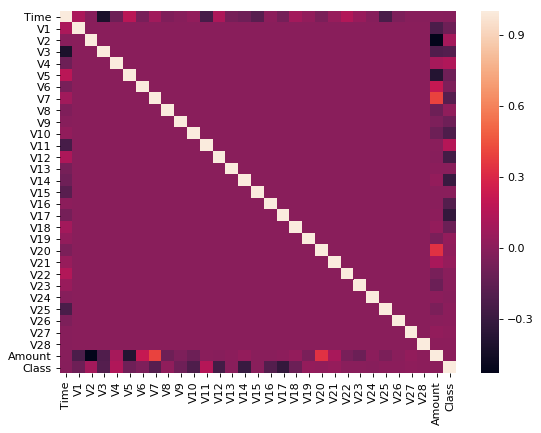

In [24]:
corr= df.corr()
figure(figsize= (8,6), dpi= 80)
sns.heatmap(corr)

In [40]:
corr_val= df.corr()['Class']
neg_corr= (corr_val < 0)
pos_corr= [corr_val > 0]

In [41]:
print(neg_corr)

[True, True, False, True, False, True, True, True, False, True, True, False, True, True, True, True, True, True, True, False, False, False, False, True, True, False, False, False, False, False, False]


In [5]:
X= df.drop('Class',axis=1)
Y= df['Class'].values

In [6]:
from sklearn.cluster import KMeans
model_= KMeans(init= 'k-means++', 
               n_clusters= 2, 
               n_init= 10,
               algorithm= 'elkan')
model_.fit(X)

KMeans(algorithm='elkan', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=2, n_init=10, n_jobs=None, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [7]:
labels= model_.labels_
labels

array([1, 1, 1, ..., 0, 0, 0])

In [8]:
df['ClusterLabel']= labels

In [9]:
cl_0= pd.DataFrame(df[df['ClusterLabel'] == 0])
cl_0.head()

cl_1 = pd.DataFrame(df[df['ClusterLabel'] == 1])
cl_1.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V22,V23,V24,V25,V26,V27,V28,Amount,Class,ClusterLabel
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0,1
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0,1
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0,1
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0,1
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0,1


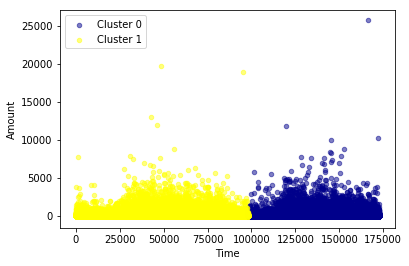

In [10]:
ax = cl_0[:].plot(kind= 'scatter',x= 'Time', y= 'Amount', color= 'DarkBlue', label = 'Cluster 0', alpha = 0.5);
cl_1[:].plot(kind= 'scatter',x= 'Time', y= 'Amount', color= 'Yellow', label = 'Cluster 1', ax= ax,  alpha = 0.5);

The K-Means model helps us seggregate the transactions into two clusters. Ofcourse, the segmentation isn't clearly based on the Class Label. Becasue the target is a binary value, we can use logistic regression to predict it.

In [11]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test= train_test_split(X,Y, test_size= 0.5, random_state= 4)

In [12]:
from sklearn.linear_model import LogisticRegression

model_L= LogisticRegression(solver= 'liblinear',
                             dual= True)
model_L.fit(x_train, y_train)

C:\Users\rgangurde\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


LogisticRegression(C=1.0, class_weight=None, dual=True, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='liblinear',
          tol=0.0001, verbose=0, warm_start=False)

In [13]:
yHat= model_L.predict(x_test)
yHat_Prob= model_L.predict_proba(x_test)

In [14]:
from sklearn import metrics

print('ROC:', metrics.roc_auc_score(y_test, yHat_Prob[:,1]))
print('Accuracy:', metrics.accuracy_score(y_test, yHat))

ROC: 0.6219030108909228
Accuracy: 0.9983638100053369


In [55]:
from sklearn.metrics import classification_report, confusion_matrix
import itertools
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
print(confusion_matrix(y_test, yHat, labels=[1,0]))

[[205  39]
 [  5 997]]


Confusion matrix, without normalization
[[     0    233]
 [     0 142171]]


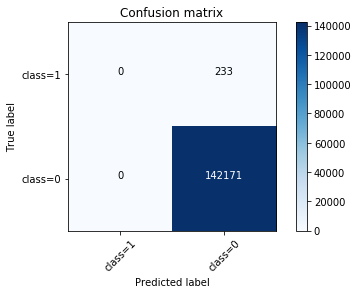

In [16]:
cnf_matrix = confusion_matrix(y_test, yHat, labels=[1,0])
np.set_printoptions(precision=2)


# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=['class=1','class=0'],normalize= False,  title='Confusion matrix')

In [92]:
print('F1 SCORE:\n', classification_report(yHat, y_test))

F1 SCORE:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00    142650
           1       0.00      0.00      0.00         0

   micro avg       1.00      1.00      1.00    142650
   macro avg       0.50      0.50      0.50    142650
weighted avg       1.00      1.00      1.00    142650



C:\Users\rgangurde\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\metrics\classification.py:1145: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)
C:\Users\rgangurde\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\metrics\classification.py:1145: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)
C:\Users\rgangurde\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\metrics\classification.py:1145: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)


In [17]:
from sklearn.metrics import log_loss
log_loss(y_test, yHat_Prob)

0.056395234491644616

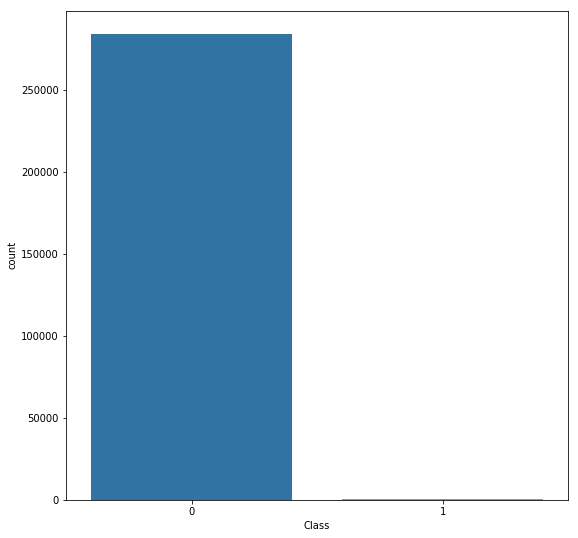

In [33]:
plt.figure(figsize= (9,9))
sns.countplot('Class', data= df)

In [42]:
shuffled= df.sample(frac= 1, random_state= 5)
fraud= shuffled.loc[shuffled['Class'] == 1]
non_fraud= shuffled.loc[shuffled['Class'] == 0].sample(n=2000, random_state= 42)

normalized_df = pd.concat([fraud, non_fraud])

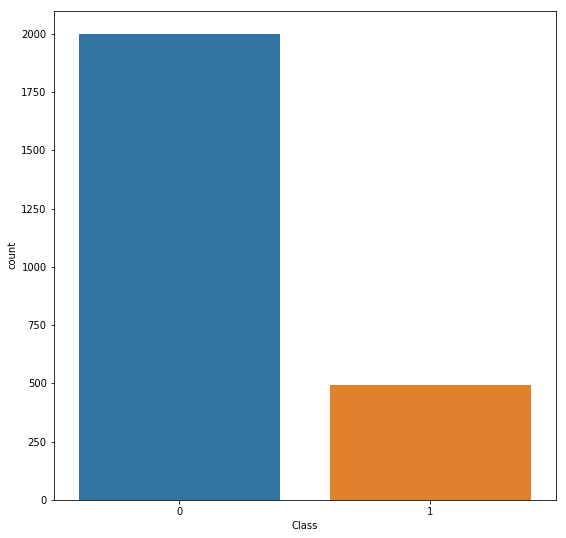

In [43]:
plt.figure(figsize= (9,9))
sns.countplot('Class', data= normalized_df)

In [45]:
from sklearn.model_selection import train_test_split
X= normalized_df.drop('Class',axis=1)
Y= normalized_df['Class'].values
x_train, x_test, y_train, y_test= train_test_split(X,Y, test_size= 0.5, random_state= 4)

In [119]:
model_L.fit(x_train, y_train)

C:\Users\rgangurde\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


LogisticRegression(C=1.0, class_weight=None, dual=True, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='liblinear',
          tol=0.0001, verbose=0, warm_start=False)

In [120]:
yHat= model_L.predict(x_test)
yHat_Prob= model_L.predict_proba(x_test)

In [121]:
print('ROC:', metrics.roc_auc_score(y_test, yHat_Prob[:,1]))

ROC: 0.619425084257714


Confusion matrix, without normalization
[[   2  242]
 [   1 1001]]


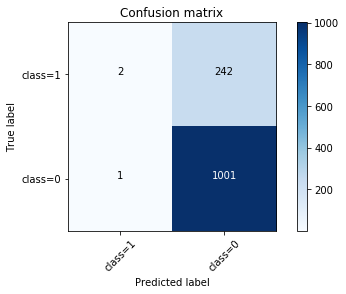

In [122]:
cnf_matrix = confusion_matrix(y_test, yHat, labels=[1,0])
np.set_printoptions(precision=2)


# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=['class=1','class=0'],normalize= False,  title='Confusion matrix')

In [108]:
print('F1 SCORE:\n', classification_report(yHat, y_test))

F1 SCORE:
               precision    recall  f1-score   support

           0       1.00      0.91      0.95      2576
           1       0.08      1.00      0.15        20

   micro avg       0.91      0.91      0.91      2596
   macro avg       0.54      0.96      0.55      2596
weighted avg       0.99      0.91      0.95      2596



In [47]:
from sklearn.ensemble import RandomForestRegressor

rfr= RandomForestRegressor(n_estimators= 200, max_depth= 8)
rfr.fit(x_train, y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=8,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=200, n_jobs=None,
           oob_score=False, random_state=None, verbose=0, warm_start=False)

In [1]:
yHat= rfr.predict(x_test)

NameError: name 'rfr' is not defined

In [50]:
from sklearn import metrics
print('ROC:', metrics.roc_auc_score(y_test, yHat))

ROC: 0.965885851248323


In [54]:
yHat = yHat.round()

Confusion matrix, without normalization
[[205  39]
 [  5 997]]


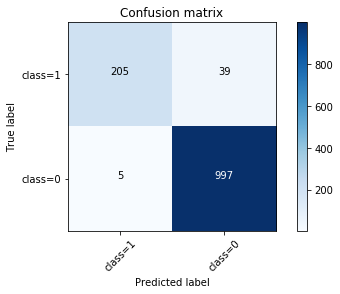

In [56]:
cnf_matrix = confusion_matrix(y_test, yHat, labels=[1,0])
np.set_printoptions(precision=2)


# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=['class=1','class=0'],normalize= False,  title='Confusion matrix')